# Re-Referencing EEG Signals

An EEG signal is an electric potential difference (voltage) between each electrode and a reference electrode.

A reference channel provides a stable zero-potential point to measure brain activity.

**Re-referencing** is the process of changing the reference channel(s) of the EEG signals.

No perfect reference exists, leading to various choices.

**Common EEG/ERP Reference Types**

* **Linked Mastoids:** A pair of electrodes on the mastoid bones behind each ear, labeled as TP9 and TP10 in the 10-20 system.
* **Average Reference:** A virtual reference calculated by averaging all scalp electrode signals.
* **Cz/Fz/Oz:** A single scalp electrode, often Cz (vertex), used as a local reference.

## Install MNE Library

In [1]:
# install MNE library
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.6 MB/s eta 0:00:00


## Download ERP Epochs Data File

We use the data file of cleaned ERP epochs saved in the previous lesson:

In [2]:
# download EEG data file
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14-epo.fif

--2026-01-08 14:32:34--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_14-epo.fif
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20719965 (20M) [application/octet-stream]
Saving to: ‘N400_dataset_14-epo.fif’

N400_dataset_14-epo 100%[===================>]  19.76M  7.14MB/s    in 2.8s    

2026-01-08 14:32:39 (7.14 MB/s) - ‘N400_dataset_14-epo.fif’ saved [20719965/20719965]



## Import Libraries

In [3]:
import mne
mne.set_log_level('error')

import matplotlib.pyplot as plt
import numpy as np

## Read the Cleaned Data

We read a data file of ERP epochs:

In [5]:
# read data
epochs = mne.read_epochs('N400_dataset_14-epo.fif', preload='True')

# set the easycap-M1 montage to data
epochs.set_montage('easycap-M1', on_missing='ignore')


<EpochsFIF | 538 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~39.5 MiB, data loaded,
 'PicOnset': 144
 'RespPrompt': 95
 'CorResp': 134
 'IncorResp': 11
 'RespFeedback': 10
 'Match/A': 18
 'Match/B': 18
 'Match/C': 18
 'Match/D': 18
 'Mismatch/A': 18
 and 3 more events ...>

## Comparing Different Reference Types

In order to compare different reference types, we will visualize multiple topomaps over time for each reference type: electrode reference, average reference and mastoid reference.

MNE provides the **`mne.Evoked.plot_topomap()`** method for plotting multiple topomaps from an **`Evoked`** object at specified time points.

We create an **`Evoked`** object from the **`Epochs`** object using the **`epochs.average()`** method:

In [6]:
# create an Evoked object from an Epochs object
evoked = epochs.average()

## Reference Electrode

In the data set we are analyzing, the reference electrode was located at the International 10-20 System position FCz, which is located along the midline of the scalp, halfway between electrodes Fz and Cz.

### Plot the Topomaps

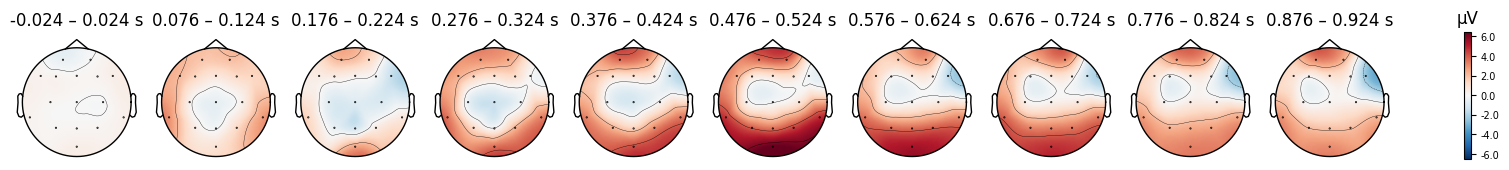

In [7]:
# specify times to plot at, arguments: min, max, stepsize
times = np.arange(0, epochs.tmax, 0.1)

# plot the topomaps
evoked.plot_topomap(times=times, average=.050);

Since the reference electrode FCz is locateded between Fz and Cz, <br>
then the measured electrical activity in each of the electrodes Fz and Cz is very small.<br>
And so, in the topomaps, the area between electrodes Fz and Cz is white, or very close to it, at most time points.

# Average Reference

While the choice of reference during recording is somewhat arbitrary, the choice of what to use as a reference in preprocessing is, however, an important one.

Since this choice will influence the amplitude values at each channel, it will influence where ERP effects are identified, their polarity, and possibly how large they are.

An alternative to selecting a specific electrode(s) to re-reference to, is to use the average reference, which is the average potential across all electrodes.

MNE provides the **`set_eeg_reference()`** method to re-reference the data.

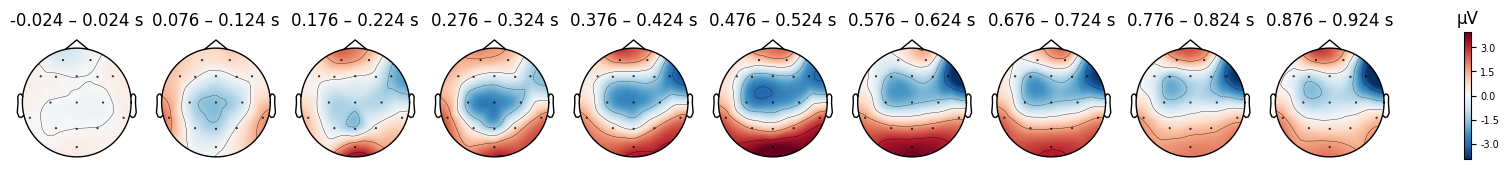

In [8]:
# set average reference
evoked_averageref = evoked.set_eeg_reference(ref_channels='average')

# plot the topomaps
evoked_averageref.plot_topomap(times=times, average=.050);

Compared to the previous set of topomaps above, we can see that the average reference shows a large negative potential over the top of the head, especially around electrodes Fz and Cz.

Notably, however, the overall distribution of electrical activity is similar between the original and average-referenced data.

For example, the voltage at the back of the head is still positive relative to the top/centre of the scalp.

## Mastoids Reference

Now we will re-reference to the average of the mastoid electrodes (whose labels are TP9 and TP10 in the 10-20 system).

We use the **`Epochs.plot_sensors()`** method to visualize the locations of the sensors associated with an Epochs object:

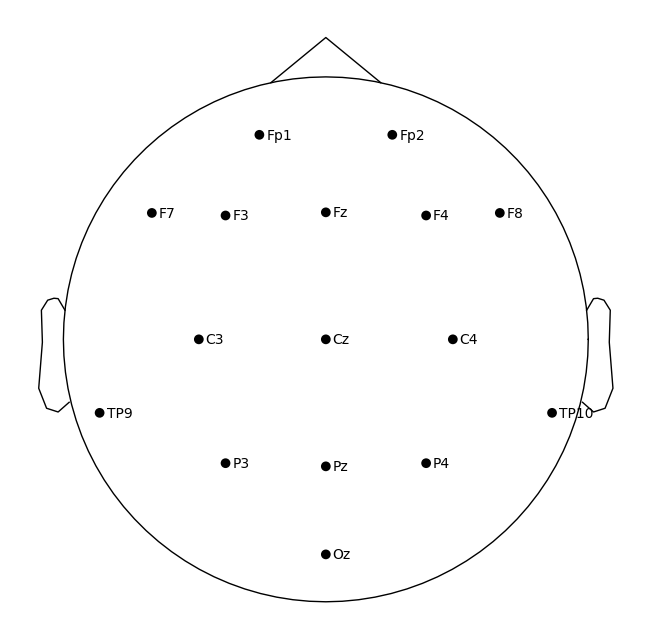

In [9]:
# plot sensor locations on a scalp map
epochs.plot_sensors(show_names=True);

We use the **`evoked.set_eeg_reference()`** method to set the reference to mastoid electrodes.

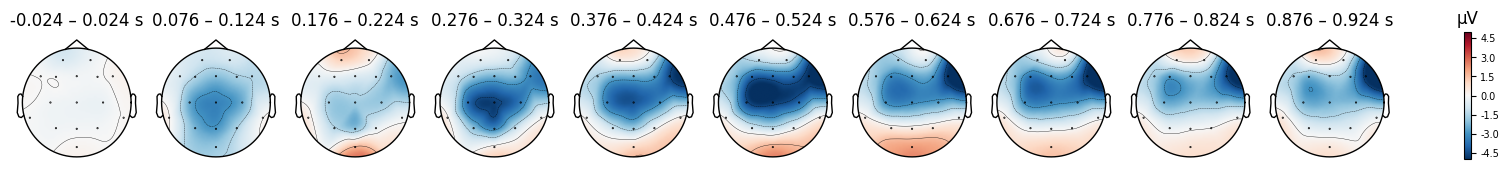

In [10]:
# set mastoids reference (TP9 and TP10)
evoked_mastoidref = evoked.set_eeg_reference(ref_channels=['TP9', 'TP10'])

# plot the topomaps
evoked_mastoidref.plot_topomap(times=times, average=.050);

The relative distribution of electrical potentials across the scalp is similar to the original and average-referenced data.

However, now the white, "zero voltage" area overlaps the locations behind the ears, and the top/centre electrodes (extending to more frontal electrodes) are more negative than when other references were used.

## Save Re-referenced Data

We save the mastoid re-referenced epochs data to a file:

In [9]:
# re-reference data
epochs_mastoidref = epochs.set_eeg_reference(ref_channels=['TP9', 'TP10'])

# save re-referenced data to file
epochs_mastoidref.save('N400_dataset_14-mstd-epo.fif', overwrite=True)

[PosixPath('/content/N400_dataset_14-mstd-epo.fif')]